<a href="https://colab.research.google.com/github/Rajeeb321123/Deep-learning-tensorFlow-Journey/blob/master/01_neural_network_regression_with_tensorflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Network in TensorFlow

There are many defination for regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter ... predicting a number.

In [ ]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.15.0


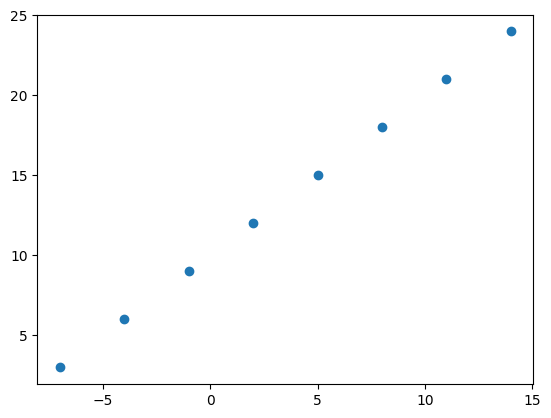

In [ ]:
# Creating data to view and fit
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])


# Visualize it
plt.scatter(X, y)

In [ ]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output Shapes

In [ ]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
X[0], y[0]

(-7.0, 3.0)

In [ ]:
X[1], y[1]

(-4.0, 6.0)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [ ]:
X[0].ndim

0

In [ ]:
X[0], y[0]

(-7.0, 3.0)

In [ ]:
# Turn our NumPy arrays to tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

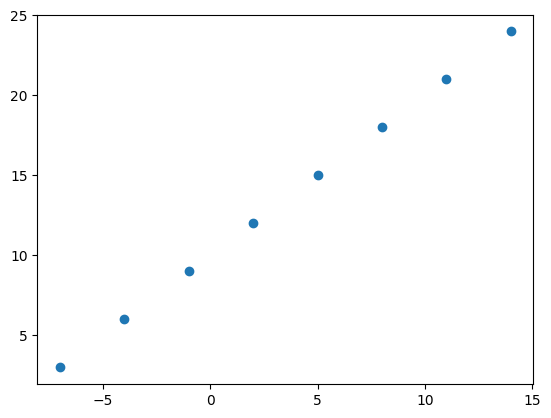

In [ ]:
plt.scatter(X, y)

##  Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of deep learing model.
2. **Compiling a model** - define the loss function ( in other words, the function which tells our model how wrong it is ) and the optimizer (tells our model how to imporve the patterns its learning) and evaluation metrics (what we can use to interpret the performance or our model).
3. **Fitting a model** - letting the model try to find patterns between X and y (features and labesls)

In [ ]:
# set random seed (for reproducibility)
tf.random.set_seed(42)

# 1. Create a model using the sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1) # Why 1 :to get 1 input and predict out one output
])

#2. Compile the model
model.compile(loss = tf.keras.losses.mae, # mae is short for Mean Absolute error
              optimizer = tf.keras.optimizers.SGD(), # SGD is short for stochastic Gradient Descent. stochastic means randomness
              metrics = ["mae"]
              )

#3. Fit the model
model.fit(tf.expand_dims(X,axis=-1), y, epochs=5) # epochs = 5 means five opportunities



Epoch 1/5
1/1 [==============================] - 0s 441ms/step - loss: 17.5959 - mae: 17.5959
Epoch 2/5
1/1 [==============================] - 0s 11ms/step - loss: 17.3146 - mae: 17.3146
Epoch 3/5
1/1 [==============================] - 0s 10ms/step - loss: 17.0334 - mae: 17.0334
Epoch 4/5
1/1 [==============================] - 0s 10ms/step - loss: 16.7521 - mae: 16.7521
Epoch 5/5
1/1 [==============================] - 0s 10ms/step - loss: 16.4709 - mae: 16.4709


In [ ]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 89ms/step


array([[-11.191338]], dtype=float32)

In [ ]:
y_pred + 11.2876

array([[0.09626198]], dtype=float32)

## Imporving our model

We can improve our model, by altering the steps we took to create a model

1. **Creating a model** - here we might add more layers, increase the number of hidden units ( all called nuerons ) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **Learning rate** of the optimizion function.
3. **Fitting a model** - here we might fit a model for more **epoch** (leave it training for longer) or on more data (give the model more example to learn from)

In [ ]:
# let's rebuild our model

#1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3. FIt the model (this time we are going to train longer with more epochs)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 294ms/step - loss: 11.1159 - mae: 11.1159
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 10.9834 - mae: 10.9834
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 10.8509 - mae: 10.8509
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 10.7184 - mae: 10.7184
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 10.5859 - mae: 10.5859
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 10.4534 - mae: 10.4534
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 10.3209 - mae: 10.3209
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 10.1884 - mae: 10.1884
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 10.0559 - mae: 10.0559
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 9.9234 - mae: 9.9234
Epoch 11/100
1/1 [==============================] - 0s 1

In [ ]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# let's see if our model's prediction has improved
model.predict([17])

1/1 [==============================] - 0s 86ms/step


array([[29.65719]], dtype=float32)

In [ ]:
# Let's see if we can make another to improve our model

# 1. Create the model (this time with an extra hidden layer with 100 epochs)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation = None),
    tf.keras.layers.Dense(1)
    ])

#2. Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), # very important: Learning_rate is the most important hyper parameter for most neural network
              metrics=["mae"]
              )
#3. fit the model
model.fit(tf.expand_dims(X, axis = -1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 783ms/step - loss: 14.4117 - mae: 14.4117
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 13.7611 - mae: 13.7611
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 13.1219 - mae: 13.1219
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 12.4913 - mae: 12.4913
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 11.8661 - mae: 11.8661
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 11.2431 - mae: 11.2431
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 10.6181 - mae: 10.6181
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 9.9870 - mae: 9.9870
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 9.3458 - mae: 9.3458
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 8.6906 - mae: 8.6906
Epoch 11/100
1/1 [==============================] - 0s 9

In [ ]:
# let's remind ourself of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Let's try to make a prediction
model.predict([17.0])
# overfitting error so even more wrong prediciton

1/1 [==============================] - 0s 156ms/step


array([[26.835327]], dtype=float32)

## Evaluating  a model

In practice, a typical workflow you'll go through when building neural network is :

```
Build a model -> fit it -> evaluate it  -> tweak a model ->
fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...
```

when it comes to evaluation... there are 3 word we should memorize:

> "Visualize, Visualize, Visualize"

It's a good idea to Visualize:
* The data - what data are we working with ? what does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predicitons of the model - how do the predictions of a model line up against the ground truth (original labels)

In [ ]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

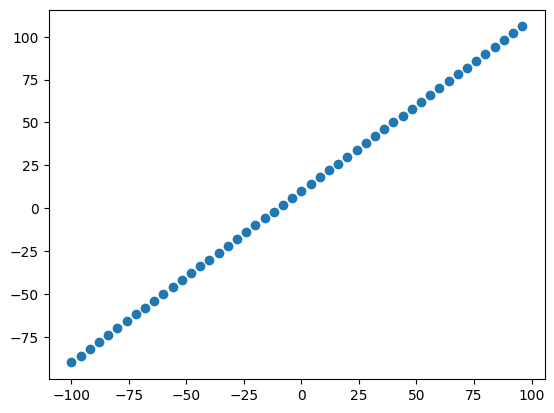

In [ ]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X, y)

### The 3 sets...

* **Training set** - the model learns from this data, which is typically 70%-80% of the data we have available.
* **Validation set** - the model gets turned on this data, which is typically 10-15% of the data available
* **Test set** - the model gets evaluated on this data to test what is has learned, this is typically 10% - 15% of the data available

In [ ]:
# Check the length of how many samples we have
len(X)

50

In [ ]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 are the testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

Now we've got our data in training and test sets... let's visualize it again!

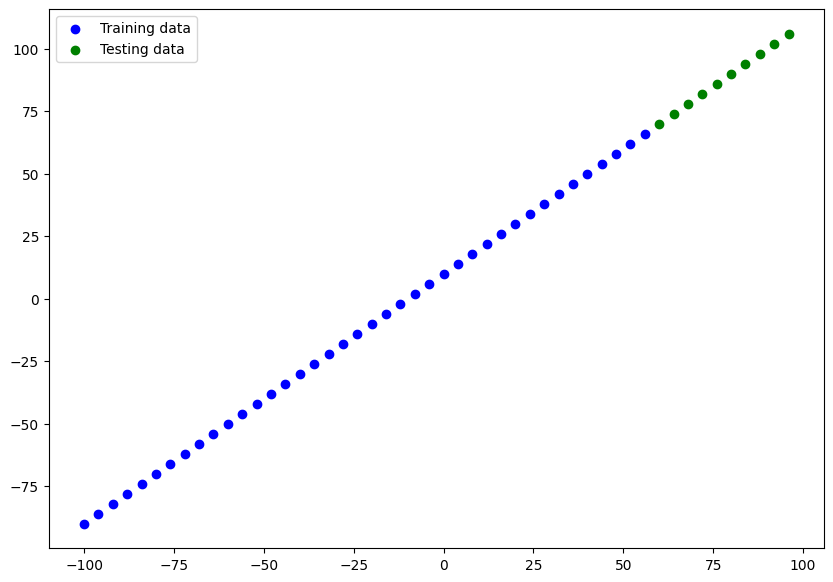

In [ ]:
plt.figure(figsize=(10,7))
# plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
# plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")
# Show a legend ( to recognize the plot apart)
plt.legend();

In [ ]:
# Let's have a look at how to build a neural network for our data

# 1. Create a model
model = tf.keras.Sequential([tf.keras.layers.Dense(1)])

# 2. compile the model
model.compile (loss = tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.SGD(),
               metrics = ["mae"])

# 3. Fit the model
# model.fit(X_train, y_train, epochs=100)
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

### Visulazing the model


In [ ]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [ ]:
# Let's create a model which builds automatically by defining the input shape argument in the 1st layer

tf.random.set_seed(42)

# Create a model (same as above)
# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(1, input_shape = [1] ) # 1 output layer so 1, 1 input layerso input shape is 1
#     ])

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape = [1] , name = "input_layer" ),
    tf.keras.layers.Dense(1, name = "outputlayer")
    ], name = "model_1")

# 2. Compile the model
model.compile (loss = tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.SGD(),
               metrics= ["mae"])


In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 outputlayer (Dense)         (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* total params - total number of parameters in the model
* Trainable parameters - these are the parameters (pattern) the model can update as it trains.
* Non-trainable params - these parameters aren't updated during training (this is typical when you bring in already learned patterns or parameters from other models during **Transfer learning**

📖 **Resources:** for a more in-depth overview of trainable parameters within a layer, check out MIT's introduction to deep learning.

⚒️ **Exercise:** Try playing around with the number of hidden units in the dense layer, see how that effects the number of parameters (total and trainable  by calling model.summary() )

In [ ]:
# let's the fit our model to the training data
model.fit(X_train, y_train, epochs=100, verbose =0)

In [ ]:
# Get a summary of model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 outputlayer (Dense)         (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


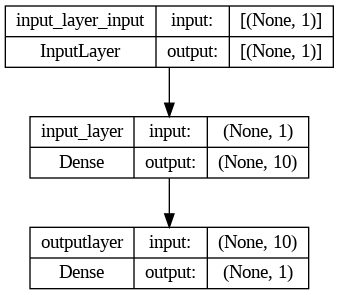

In [ ]:
from keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### Visualizing our model prediction

To visualize prediction, it's good idea to plot them against the ground truth labels.

Often you'll se this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus your model's prediciton)

In [ ]:
# Make some predictions
y_pred  = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 49ms/step


array([[ 91.211   ],
       [ 97.16747 ],
       [103.123955],
       [109.08042 ],
       [115.0369  ],
       [120.993385],
       [126.94987 ],
       [132.90634 ],
       [138.86282 ],
       [144.8193  ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

🗝️ **Note:** If you feel like you're going to reuse some king of functionality in the future, it's a good idea to turn it into function

In [ ]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plot training data, test data and compares predictions to ground truth1
  """
  plt.figure(figsize=(10,7))
  #plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  #plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  #plot model's predictions in red
  plt.scatter(test_data, predictions, c="r", label = "Predictions")

  # for legend
  plt.legend()


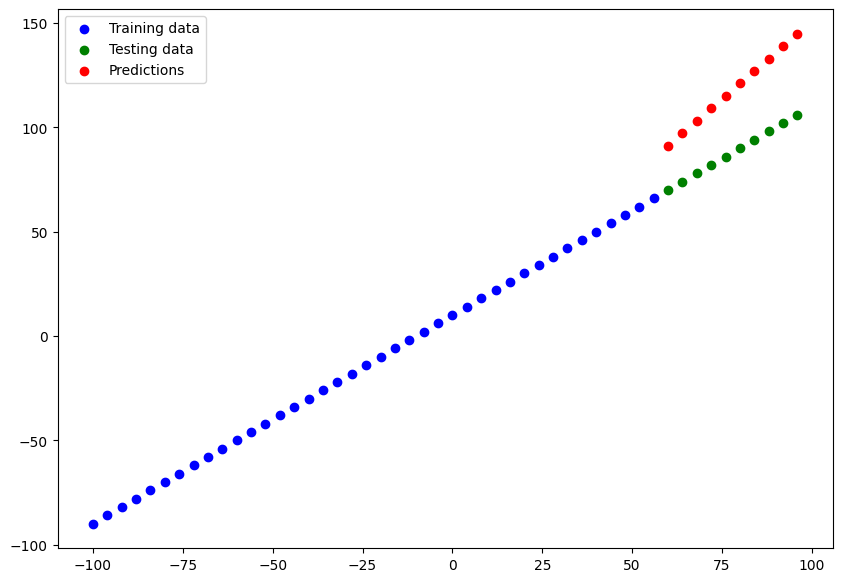

In [ ]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on regression, two of the main metrics:
* MAE - mean absolute errors,"on average, how wrong is each of my model's predictions"
* MSE - mean square error, "square the average errors"

In [ ]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 132ms/step - loss: 30.0151 - mae: 30.0151


[30.015148162841797, 30.015148162841797]

In [ ]:
# Calulate the mean absolute error
mae=tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([10.2422  , 12.066989, 15.699163, 21.080421, 27.036901, 32.993385,
       38.949867, 44.90634 , 50.862823, 56.819305], dtype=float32)>

In [ ]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 91.211   ],
       [ 97.16747 ],
       [103.123955],
       [109.08042 ],
       [115.0369  ],
       [120.993385],
       [126.94987 ],
       [132.90634 ],
       [138.86282 ],
       [144.8193  ]], dtype=float32)>

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 91.211   ,  97.16747 , 103.123955, 109.08042 , 115.0369  ,
       120.993385, 126.94987 , 132.90634 , 138.86282 , 144.8193  ],
      dtype=float32)>

In [ ]:
# Calculate mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred= tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=30.015148>

In [ ]:
# Calculate mean squared error
tf.metrics.mean_squared_error(
    y_true=y_test,
    y_pred=tf.squeeze(y_pred)
)

<tf.Tensor: shape=(), dtype=float32, numpy=932.48846>

In [ ]:
# Make some function to reuse MAE adn MSE
def mae(y_true, y_pred) :
   return tf.metrics.mean_absolute_error(
    y_true=y_test,
    y_pred=tf.squeeze(y_pred)
)
def mse(y_true, y_pred) :
  return tf.metrics.mean_squared_error(
    y_true=y_test,
    y_pred=tf.squeeze(y_pred)
)

### Running experiments to improve our model

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it ...
```

1. Get more data - get more example for your model to train on (more opportunities to learn patterns or relationships between features and labels).
2. Make you model larger (using a complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give your model of a chance to find patterns in the data.

Let's do 3 modelling experiments:
1. `model_1` - same as the original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs.
3. `model_3` - 2 layers, trained for 500 epochs.
4. todo
5. todo

In [ ]:
# Set random seed
tf.random.set_seed(42)


model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape = [1] ),
    ])

# 2. Compile the model
model_1.compile (loss = tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.SGD(),
               metrics= ["mae"])

# 3. Fit the model
model_1.fit(X_train, y_train, epochs=100)


Epoch 1/100
2/2 [==============================] - 0s 9ms/step - loss: 51.8354 - mae: 51.8354
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 18.5607 - mae: 18.5607
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 10.2616 - mae: 10.2616
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 9.4303 - mae: 9.4303
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 10.3167 - mae: 10.3167
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 9.5632 - mae: 9.5632
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 8.6830 - mae: 8.6830
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 9.0644 - mae: 9.0644
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 19.0125 - mae: 19.0125
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 10.2673 - mae: 10.2673
Epoch 11/100
2/2 [==============================] - 0s 6ms/step - l

1/1 [==============================] - 0s 48ms/step


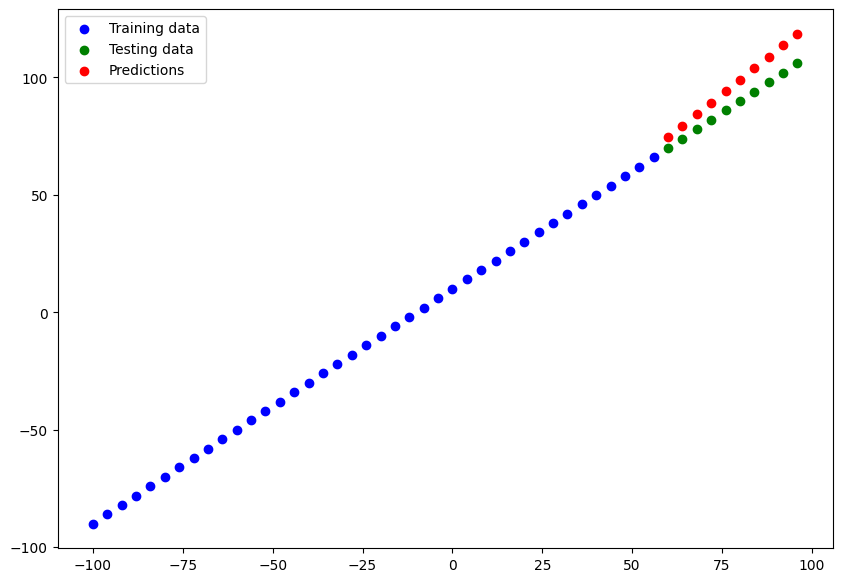

In [ ]:
# Make the plot prediction for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)


In [ ]:
tf.squeeze(y_preds_1)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 74.59883 ,  79.486465,  84.3741  ,  89.26173 ,  94.14935 ,
        99.03699 , 103.92462 , 108.81225 , 113.699875, 118.58751 ],
      dtype=float32)>

In [ ]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=8.593172>,
 <tf.Tensor: shape=(), dtype=float32, numpy=80.342674>)

**Build `model_2`**
* 2 dense layers, trained for 100 epochs

In [ ]:
# Set random seeds
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])
# 3. fit the model
model_2.fit(tf.expand_dims(X_train,axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 9ms/step - loss: 13.7878 - mae: 13.7878
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 22.7667 - mae: 22.7667
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 20.8915 - mae: 20.8915
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 13.5146 - mae: 13.5146
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 18.2870 - mae: 18.2870
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 8.6145 - mae: 8.6145
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 12.4959 - mae: 12.4959
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 11.0423 - mae: 11.0423
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 39.4969 - mae: 39.4969
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 27.0168 - mae: 27.0168
Epoch 11/100
2/2 [==============================] - 0s 7ms/st

1/1 [==============================] - 0s 48ms/step


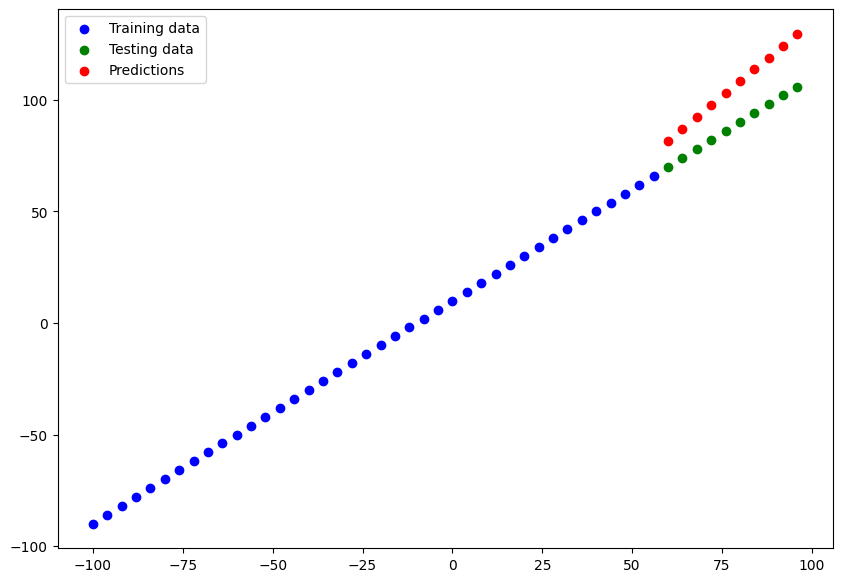

In [ ]:
# Make the plot prediction of model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [ ]:
# Calulate the model_2 evaluation metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=17.67823>,
 <tf.Tensor: shape=(), dtype=float32, numpy=327.1298>)

**Build `model_3`**
* 2 layers, trained for 500 epochs

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)


Epoch 1/500
2/2 [==============================] - 0s 10ms/step - loss: 45.7382 - mse: 2923.4932
Epoch 2/500
2/2 [==============================] - 0s 6ms/step - loss: 33.6635 - mse: 1485.4656
Epoch 3/500
2/2 [==============================] - 0s 8ms/step - loss: 36.5066 - mse: 2070.8950
Epoch 4/500
2/2 [==============================] - 0s 8ms/step - loss: 18.7793 - mse: 491.2812
Epoch 5/500
2/2 [==============================] - 0s 6ms/step - loss: 24.5295 - mse: 894.1100
Epoch 6/500
2/2 [==============================] - 0s 6ms/step - loss: 11.1147 - mse: 137.7035
Epoch 7/500
2/2 [==============================] - 0s 6ms/step - loss: 12.2106 - mse: 189.7901
Epoch 8/500
2/2 [==============================] - 0s 6ms/step - loss: 13.3104 - mse: 250.4762
Epoch 9/500
2/2 [==============================] - 0s 6ms/step - loss: 35.6715 - mse: 1921.1199
Epoch 10/500
2/2 [==============================] - 0s 6ms/step - loss: 23.6268 - mse: 781.2686
Epoch 11/500
2/2 [==========================

1/1 [==============================] - 0s 146ms/step


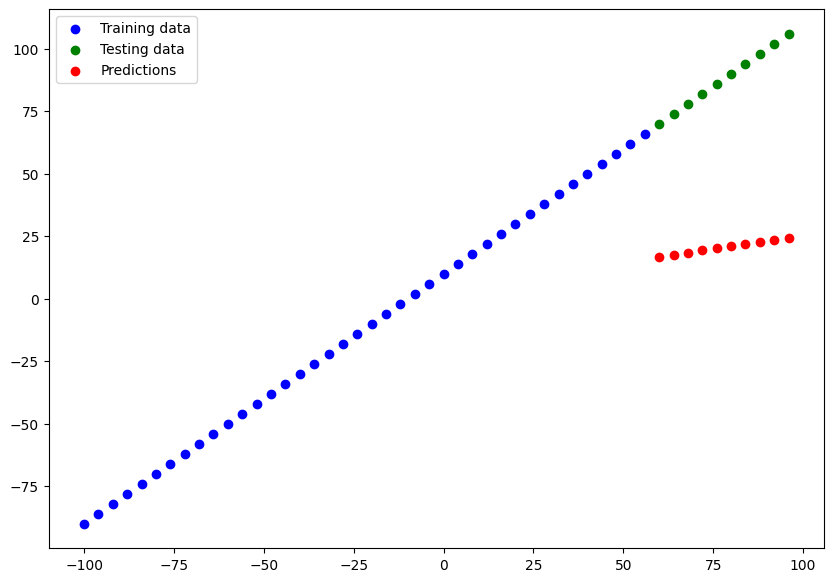

In [ ]:
# Make the plot prediction of model_3
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

# overfitting

In [ ]:
mae_3= mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=67.42883>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4629.7163>)

In [ ]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [ ]:
tf.expand_dims(X_train, axis=-1 ), y_train

(<tf.Tensor: shape=(40, 1), dtype=int32, numpy=
 array([[-100],
        [ -96],
        [ -92],
        [ -88],
        [ -84],
        [ -80],
        [ -76],
        [ -72],
        [ -68],
        [ -64],
        [ -60],
        [ -56],
        [ -52],
        [ -48],
        [ -44],
        [ -40],
        [ -36],
        [ -32],
        [ -28],
        [ -24],
        [ -20],
        [ -16],
        [ -12],
        [  -8],
        [  -4],
        [   0],
        [   4],
        [   8],
        [  12],
        [  16],
        [  20],
        [  24],
        [  28],
        [  32],
        [  36],
        [  40],
        [  44],
        [  48],
        [  52],
        [  56]], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

🗝️**Note:** You want to start with small experiments (small models) and make sure they work and then increase their scale when necessary.


### Comparing the results of our experiments

We've ran a few experiments, let's compare the results


In [ ]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,8.593172,80.342674
1,model_2,17.678230,327.129791
2,model_3,67.428833,4629.716309


Looks like model_2 performed the best

In [ ]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


🗝️ **Note:** One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you will figure out which don't work and in turn, get clore to figuring out what does work. Remember the machine learning pactioner's motto: "experiment, experiment, experiment".

## Tracking your experiments

One really good habit in machine learning modelling is to track the results of your experiments.

And when doing so, it can be tedious if your're running lots of experiments.

Luckily, there are tools to helps us!

📖 **Resource:** As you build more models, you'll want to look into using:

* TensorBoard - a component of the TensorFlow library to help track modelling experiments (we'll see this on later).
* weights & Biases - a tool for tracking all kinds of machine learning experiments (plugs straight into TensorBoard)

## Saving our models

Saving our models allows us to use them outside of Google Colab (or whereever they were trained) such as in a web application or a mobile app

There are two main formats we can save our model's too:
1. The SavedModel format ( best if your are using it inside tensorflow environment, default)
2. The HDF5 format (may be best if your are loading it outside into other application)

In [ ]:
# save model using the saved model foramt
model_2.save("Best_Model_SavedModel_Format")

In [ ]:
# save model using HDF5 model foramt
model_2.save("best_model_HDF5_format.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Loading in a saved model


In [ ]:
# Load in the SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model("/content/Best_Model_SavedModel_Format")
loaded_SavedModel_format.summary(), model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                              

(None, None)

In [ ]:
# compare model_2 predictions with SavedModel format model predicitons
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds == loaded_SavedModel_format_preds

1/1 [==============================] - 0s 84ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
# Load in a model using the .h5 format
loaded_h5_model = tf.keras.models.load_model("/content/best_model_HDF5_format.h5")
loaded_h5_model.summary(), model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                              

(None, None)

In [ ]:
# Check to see if loaded .h5 model predictions match model_2
model_2_preds = model_2.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
model_2_preds == loaded_h5_model_preds

1/1 [==============================] - 0s 118ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## A Larger example

In [ ]:
# import required libraries

import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# Read in the insurance dataset

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
insurance["smoker"], insurance["age"]

(0       yes
 1        no
 2        no
 3        no
 4        no
        ... 
 1333     no
 1334     no
 1335     no
 1336     no
 1337    yes
 Name: smoker, Length: 1338, dtype: object,
 0       19
 1       18
 2       28
 3       33
 4       32
         ..
 1333    50
 1334    18
 1335    18
 1336    21
 1337    61
 Name: age, Length: 1338, dtype: int64)

In [ ]:
# Let's try one hot encode our dataframe so it's all numbers

insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
# Create X & Y values (features and labels)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [ ]:
# View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
# View y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
# Create training and test sets
# Very important better way to split the data using scikitlearn than using [:40]
# sklearn.model_selection.train_test_split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [ ]:
X_train

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.950,2,1,0,1,0,0,1,0,0
1285,47,24.320,0,1,0,1,0,1,0,0,0
1142,52,24.860,0,1,0,1,0,0,0,1,0
969,39,34.320,5,1,0,1,0,0,0,1,0
486,54,21.470,3,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1095,18,31.350,4,1,0,1,0,1,0,0,0
1130,39,23.870,5,1,0,1,0,0,0,1,0
1294,58,25.175,0,0,1,1,0,1,0,0,0
860,37,47.600,2,1,0,0,1,0,0,0,1


In [ ]:
# Build a neural network (sort of like model_2 above)
tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

# 3. Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 5ms/step - loss: 8615.5410 - mae: 8615.5410
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 7880.3271 - mae: 7880.3271
Epoch 3/100
34/34 [==============================] - 0s 5ms/step - loss: 7564.7012 - mae: 7564.7012
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 7670.4619 - mae: 7670.4619
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 7674.1108 - mae: 7674.1108
Epoch 6/100
34/34 [==============================] - 0s 7ms/step - loss: 7606.5264 - mae: 7606.5264
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 7575.7549 - mae: 7575.7549
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7779.2505 - mae: 7779.2505
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7417.9097 - mae: 7417.9097
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7758.7344 - mae: 7758.7344

In [ ]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7351.8301 - mae: 7351.8301


[7351.830078125, 7351.830078125]

In [ ]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

Right now it looks like our model isn't performing too well... let's try and improve it
To (try) improve our model, we'll run 2 experiments:
1. Add and extra layer with more hidden units and use the Adam optimizer
2. Train for longer
3. (insert you own experiment here)

In [ ]:
# Set random seed
tf.random.set_seed(42)

#1.Create the model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Complike the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          # optimizer = tf.keras.optimizers.SGD(), if we use SGD(), our dataset isnot large enough for this complexa and larger model with 3 layers and too many hidden units
                          # so we use Adam
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 [==============================] - 2s 3ms/step - loss: 13317.1250 - mae: 13317.1250
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13150.8447 - mae: 13150.8447
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 12800.0430 - mae: 12800.0430
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 12098.5547 - mae: 12098.5547
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 10923.5273 - mae: 10923.5273
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 9443.0889 - mae: 9443.0889
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 8123.1392 - mae: 8123.1392
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7516.4473 - mae: 7516.4473
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7424.4512 - mae: 7424.4512
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 7405.0791 - mae:

In [ ]:
# previous model evaluation
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7351.8301 - mae: 7351.8301


[7351.830078125, 7351.830078125]

In [ ]:
# Evaluate the large model_2

insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4842.5376 - mae: 4842.5376


[4842.53759765625, 4842.53759765625]

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Createthe model (same as above)
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

# 2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"]
                          )
# 3. Fit the model
history = insurance_model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 13265.0449 - mae: 13265.0449
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13050.7432 - mae: 13050.7432
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 12604.4531 - mae: 12604.4531
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 11758.5039 - mae: 11758.5039
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 10445.7617 - mae: 10445.7617
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 8948.5010 - mae: 8948.5010
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 7807.6367 - mae: 7807.6367
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7460.0605 - mae: 7460.0605
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 7413.7305 - mae: 7413.7305
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 7394.2993 - mae:

In [ ]:
# Evaluate our third model
print("insurance model 3: ")
insurance_model_3.evaluate(X_test, y_test),
print("insurance model 2: ")
insurance_model_2.evaluate(X_test,y_test)

insurance model 3: 
9/9 [==============================] - 0s 4ms/step - loss: 3481.2615 - mae: 3481.2615
insurance model 2: 
9/9 [==============================] - 0s 3ms/step - loss: 4842.5376 - mae: 4842.5376


[4842.53759765625, 4842.53759765625]

Text(0.5, 0, 'epochs')

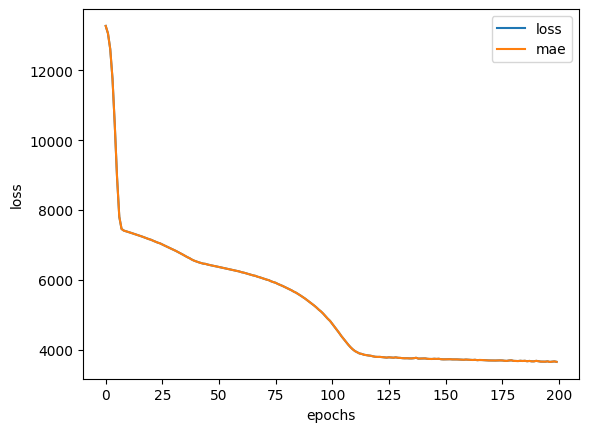

In [ ]:
# Plot history (also known as a loss curve for a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

> 🤔 **Question** How long should you train for?

It depends. Really... it depends on the problem you're working on.
However, many people have asked this question before... so, Tensorflow has a solution! It's called [Early Stopping Callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping), which is Tensorflow component you can add to model to stop training , once it stop improving certain metrics

## Preprocessing data (normalization and standardization)

In terms of scaling values, neural networks tend to prefer normalization.

if you're not sure on which to use, you could try both and see which perform better.

[Phenomenal article on normalization, standardization, by jeff hale's may be must read]("https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataframe
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
X["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

<Axes: ylabel='Frequency'>

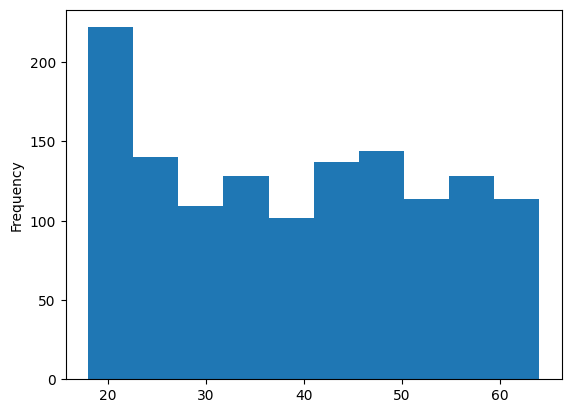

In [ ]:
X["age"].plot(kind="hist")

<Axes: ylabel='Frequency'>

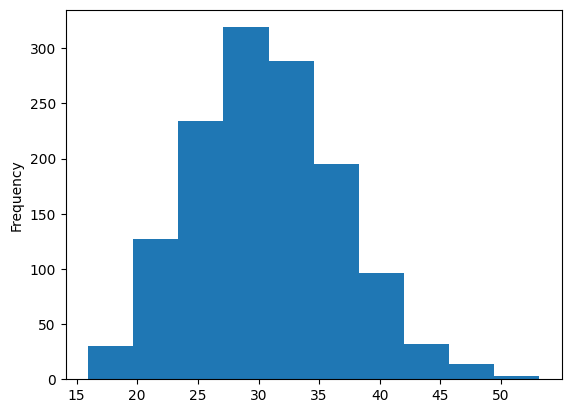

In [ ]:
X["bmi"].plot(kind="hist")

 To prepare our data, we can borrow a few classes from Scikit-Learn

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # trun all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X and y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

#Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


In [ ]:
# what does our data look like before normalization we did above?
X_train.loc[0]


age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [ ]:
# what does our data look like now after normalization?
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
X_train_normal[19]

array([0.73913043, 0.69518429, 0.4       , 0.        , 1.        ,
       0.        , 1.        , 0.        , 0.        , 1.        ,
       0.        ])

In [ ]:
# whole
X_train_normal

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

 Beautiful! Our data has been normalized and one hot encoded. Now let's build a neural network model on normalized data

In [123]:
# Build a neural network model to fit on our noramalized data
tf.random.set_seed(42)

# 1. Create the model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"]
                          )
# 3. Fit the model
insurance_model_4.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 2s 4ms/step - loss: 13343.2920 - mae: 13343.2920
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13334.8506 - mae: 13334.8506
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 13314.0547 - mae: 13314.0547
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 13270.8926 - mae: 13270.8926
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 13194.5645 - mae: 13194.5645
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 13074.0664 - mae: 13074.0664
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 12899.0547 - mae: 12899.0547
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 12659.3428 - mae: 12659.3428
Epoch 9/100
34/34 [==============================] - 0s 5ms/step - loss: 12344.6104 - mae: 12344.6104
Epoch 10/100
34/34 [==============================] - 0s 6ms/step - loss: 11949.75

In [125]:
# Evaluate our insurance model trained on normalized data
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3442.3811 - mae: 3442.3811


[3442.381103515625, 3442.381103515625]